In [1]:
# Section 0 - Library import
from data_ripple import (
    ripple_waveform,
    ripple_freq_build,
    ripple_waveform_plus,
    ripple_waveform_cros,
    ripple_grad_vmap,
)
from data_plotter import (
    ripple_waveform_plot,
    ripple_grad_plot_idx,
)

In [2]:
# Section 1.a -  Define GW data theta
# m1, m2, s1, s2, dist_mpc, c_time, c_phas, ang_inc, ang_pol
data_theta = (36.0, 29.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0)
# f_min, f_max, f_del
data_freq = (24.0, 512.0, 0.5)

In [3]:
# Section 1.b -  Generate GW data
# t ~ 37.6s
data_hp, data_hc = ripple_waveform(data_theta)
f_sig, _ = ripple_freq_build(data_freq)

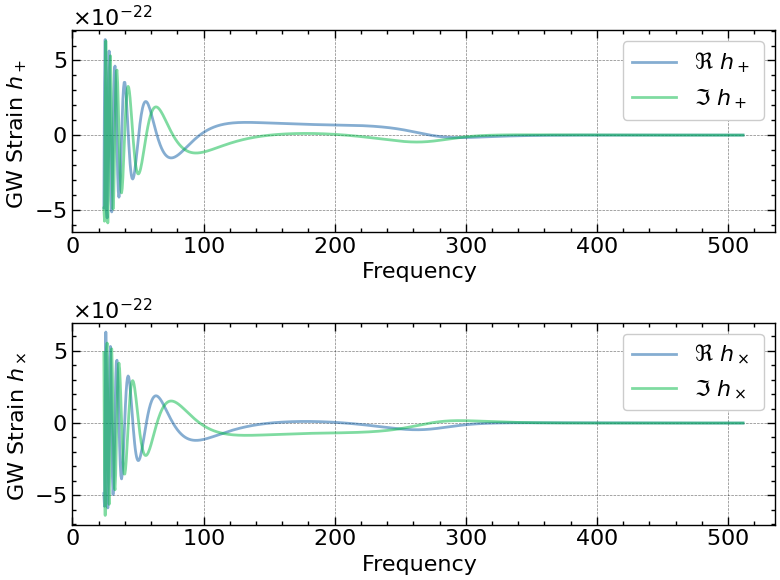

In [4]:
# Section 1.c -  Plot GW data - GW170817
data_theta_plot = data_hp, data_hc, f_sig
ripple_waveform_plot(data_theta_plot)

In [5]:
# Section 2.a -  Generate mapped grad data
# t ~ 1m51.8s
data_hp_grad = ripple_grad_vmap(ripple_waveform_plus, data_theta)
data_hc_grad = ripple_grad_vmap(ripple_waveform_cros, data_theta)

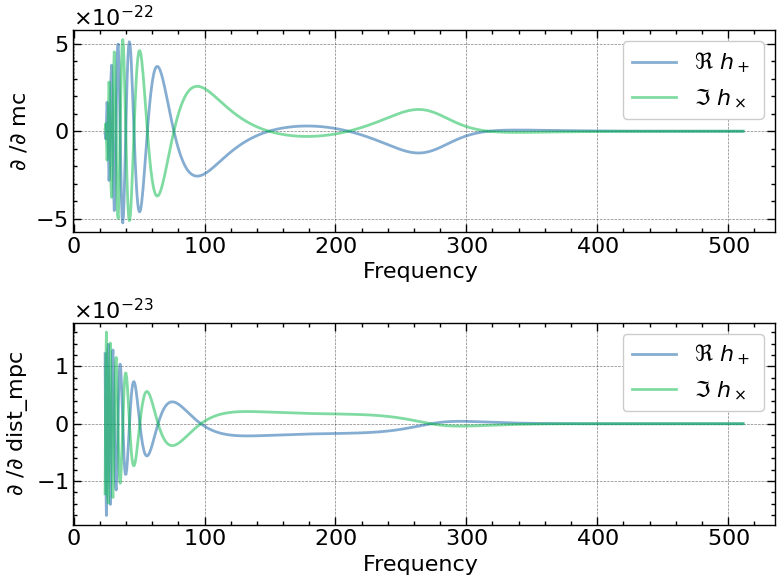

In [6]:
# Section 2.b -  Plot GW data - grad wrt data_idx
data_idx = 0, 4
data_theta_grad_plot = data_hp_grad, data_hc_grad, f_sig
ripple_grad_plot_idx(data_theta_grad_plot, *data_idx)